In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("delivery_raw.csv", sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [3]:
data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [4]:
data.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [5]:

for cid in data.columns:
    print (cid, "null count:", data[data[cid].isna()].shape[0], ", unique items:", len(pd.unique(data[cid])))


market_id null count: 987 , unique items: 7
created_at null count: 0 , unique items: 180985
actual_delivery_time null count: 7 , unique items: 178111
store_id null count: 0 , unique items: 6743
store_primary_category null count: 4760 , unique items: 75
order_protocol null count: 995 , unique items: 8
total_items null count: 0 , unique items: 57
subtotal null count: 0 , unique items: 8368
num_distinct_items null count: 0 , unique items: 20
min_item_price null count: 0 , unique items: 2312
max_item_price null count: 0 , unique items: 2652
total_onshift null count: 16262 , unique items: 173
total_busy null count: 16262 , unique items: 160
total_outstanding_orders null count: 16262 , unique items: 282
estimated_order_place_duration null count: 0 , unique items: 98
estimated_store_to_consumer_driving_duration null count: 526 , unique items: 1337


### 데이터 해석

- market_id: 지역 값, 1,2,3,4,5,6 값이 주어지거나 값이 비어 있다. 
- created_at: 주문이 생성된 시간, UTC Timestamp, 결측치 없음
- actuual_delivery_time: 배달 받은 시간, UTC Timestamp, 결측치 7개
- store_id: 식당별 고유 ID, 결측치 없음
- store_primary_category: 식당별 카테고리, 74종류+1, 결측치 존재, 같은 stord_id 인 데이터라도 store_primary_category가 여러 가지일 수 있슴
- order_protocol: 주문방식, 1,2,3,4,5,6,7 또는 빈 값, 결측치 존재, 
- total_items: 주문에 있는 음식 개수, 결측치 없음
- subtotal: 주문의 총 가격, 센트 단위, 결측치 없음
- num_distinct_items: 주문에 포함된 음식의 종류 개수, 결측치 없음
- min_item_price: 주문에 포함된 음식 중 가장 싼 음식 가격, 결측치 없음
- max_item_price: 주문에 포함된 음식 중 가장 비싼 음식 가격, 결측치 없음
- total_onshift: 주문이 생성되었을 때 가게로부터 10마일 이내에 있는 배달원들의 수, 결측치 16262개
- total_bust: 주문이 생성되었을 때 total_onshift에 포함되어 있는 배달원들 중 배달중인 배달원들의 수, 결측치 16262개
- total_outstanding_orders: 주문한 가게로부터 10마일 이내에 있는 다른 주문들의 수, 결측치 16262개
- estimated_order_place_duration: 식당이 주문을 받을 때까지 걸릴 것으로 예상되는 시간, 초단위, 다른 모델의 예측값, 결측치 없음
- estimated_store_to_consumer_driving_duration: 식당-주문자 예상소요시간, 초단위, 다른 모델의 예측값, 결측치 존재

In [6]:
#결측치 제거, 일부 이상치 제거

d2=data.dropna(axis=0)
d2 = d2[(d2['min_item_price']>0) & (d2['max_item_price']>0)]
d2 = d2[(d2['total_onshift']>0)& (d2['total_busy']>=0)& (d2['total_outstanding_orders']>=0)]
 # 총액이 1개 아이템 가격보다 작은 데이터가 실제로 들어있다.
d2 = d2[(d2['min_item_price']<=d2['subtotal']) & (d2['max_item_price']<=d2['subtotal']) & (d2['min_item_price']<=d2['max_item_price'])]




d2.info()
for cid in d2.columns:
    print (cid, "null count:", d2[d2[cid].isna()].shape[0], ", unique items:", len(pd.unique(d2[cid])))
d2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168912 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     168912 non-null  float64
 1   created_at                                    168912 non-null  object 
 2   actual_delivery_time                          168912 non-null  object 
 3   store_id                                      168912 non-null  int64  
 4   store_primary_category                        168912 non-null  object 
 5   order_protocol                                168912 non-null  float64
 6   total_items                                   168912 non-null  int64  
 7   subtotal                                      168912 non-null  int64  
 8   num_distinct_items                            168912 non-null  int64  
 9   min_item_price                                16

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000
mean,2.766245,3558.453052,2.908568,3.130198,2711.364196,2.658923,691.530229,1164.640103,45.941733,42.807332,59.562731,307.567858,546.766062
std,1.328334,2056.780923,1.512120,2.230410,1828.252232,1.607162,514.769509,555.855992,34.313163,31.941802,52.645976,89.701381,218.580052
min,1.000000,1.000000,1.000000,1.000000,109.000000,1.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1703.000000,1.000000,2.000000,1427.000000,1.000000,300.000000,800.000000,18.000000,16.000000,18.000000,251.000000,385.000000
50%,2.000000,3620.000000,3.000000,3.000000,2245.000000,2.000000,599.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,545.000000
75%,4.000000,5341.000000,4.000000,4.000000,3438.000000,3.000000,945.000000,1399.000000,67.000000,63.000000,87.000000,446.000000,704.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [7]:
#1차 속성 생성



d2['actual_delivery_time']=pd.to_datetime(d2['actual_delivery_time'])
d2['created_at']=pd.to_datetime(d2['created_at'])
d2['total_avaliable_riders']=d2['total_onshift']-d2['total_busy']
d2['order_rider_ratio']=d2['total_outstanding_orders']/d2['total_onshift']
d2['delivery_time']=(d2['actual_delivery_time']- d2['created_at']).dt.total_seconds()
d2['order_hour']=d2['created_at'].dt.hour
d2['estimated_sum_duration']=d2['estimated_order_place_duration'] + d2['estimated_store_to_consumer_driving_duration']

d2.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_avaliable_riders,order_rider_ratio,delivery_time,order_hour,estimated_sum_duration
count,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000,168912.000000
mean,2.766245,3558.453052,2.908568,3.130198,2711.364196,2.658923,691.530229,1164.640103,45.941733,42.807332,59.562731,307.567858,546.766062,3.134401,1.220202,2855.197049,8.458689,854.333919
std,1.328334,2056.780923,1.512120,2.230410,1828.252232,1.607162,514.769509,555.855992,34.313163,31.941802,52.645976,89.701381,218.580052,11.562484,0.468424,1406.627179,8.678342,234.148375
min,1.000000,1.000000,1.000000,1.000000,109.000000,1.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-64.000000,0.000000,101.000000,0.000000,153.000000
25%,2.000000,1703.000000,1.000000,2.000000,1427.000000,1.000000,300.000000,800.000000,18.000000,16.000000,18.000000,251.000000,385.000000,0.000000,0.943182,2103.000000,2.000000,684.000000
50%,2.000000,3620.000000,3.000000,3.000000,2245.000000,2.000000,599.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,545.000000,1.000000,1.201493,2656.000000,3.000000,851.000000
75%,4.000000,5341.000000,4.000000,4.000000,3438.000000,3.000000,945.000000,1399.000000,67.000000,63.000000,87.000000,446.000000,704.000000,6.000000,1.479675,3372.000000,19.000000,1017.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,86.000000,47.000000,332482.000000,23.000000,3222.000000


In [8]:
d2[d2['delivery_time']>6600].shape[0]

# 과도한 배달시간 커트: estimated_sum_duration 의 약 2배 이상 커트
d2 = d2[d2['delivery_time']<6600]
d2.info()
d2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167476 entries, 0 to 197427
Data columns (total 21 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     167476 non-null  float64       
 1   created_at                                    167476 non-null  datetime64[ns]
 2   actual_delivery_time                          167476 non-null  datetime64[ns]
 3   store_id                                      167476 non-null  int64         
 4   store_primary_category                        167476 non-null  object        
 5   order_protocol                                167476 non-null  float64       
 6   total_items                                   167476 non-null  int64         
 7   subtotal                                      167476 non-null  int64         
 8   num_distinct_items                            167476 n

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_avaliable_riders,order_rider_ratio,delivery_time,order_hour,estimated_sum_duration
count,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000,167476.000000
mean,2.769609,3559.530733,2.909951,3.126245,2706.615885,2.656010,691.355388,1163.708537,46.011017,42.861550,59.540812,307.351955,546.077050,3.149466,1.216630,2805.749839,8.478863,853.429005
std,1.327238,2056.621738,1.511816,2.225104,1823.735244,1.603249,514.282076,555.097158,34.321281,31.951988,52.609276,89.612858,218.315453,11.586038,0.464703,983.145223,8.684526,233.802437
min,1.000000,1.000000,1.000000,1.000000,109.000000,1.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-64.000000,0.000000,101.000000,0.000000,153.000000
25%,2.000000,1703.000000,1.000000,2.000000,1425.000000,1.000000,300.000000,800.000000,18.000000,16.000000,18.000000,251.000000,384.000000,0.000000,0.941176,2098.000000,2.000000,683.000000
50%,2.000000,3620.000000,3.000000,3.000000,2240.000000,2.000000,599.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,544.000000,1.000000,1.200000,2646.000000,3.000000,850.000000
75%,4.000000,5341.000000,4.000000,4.000000,3428.000000,3.000000,945.000000,1395.000000,67.000000,63.000000,87.000000,446.000000,703.000000,6.000000,1.475610,3347.000000,19.000000,1016.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,1739.000000,86.000000,47.000000,6599.000000,23.000000,3222.000000


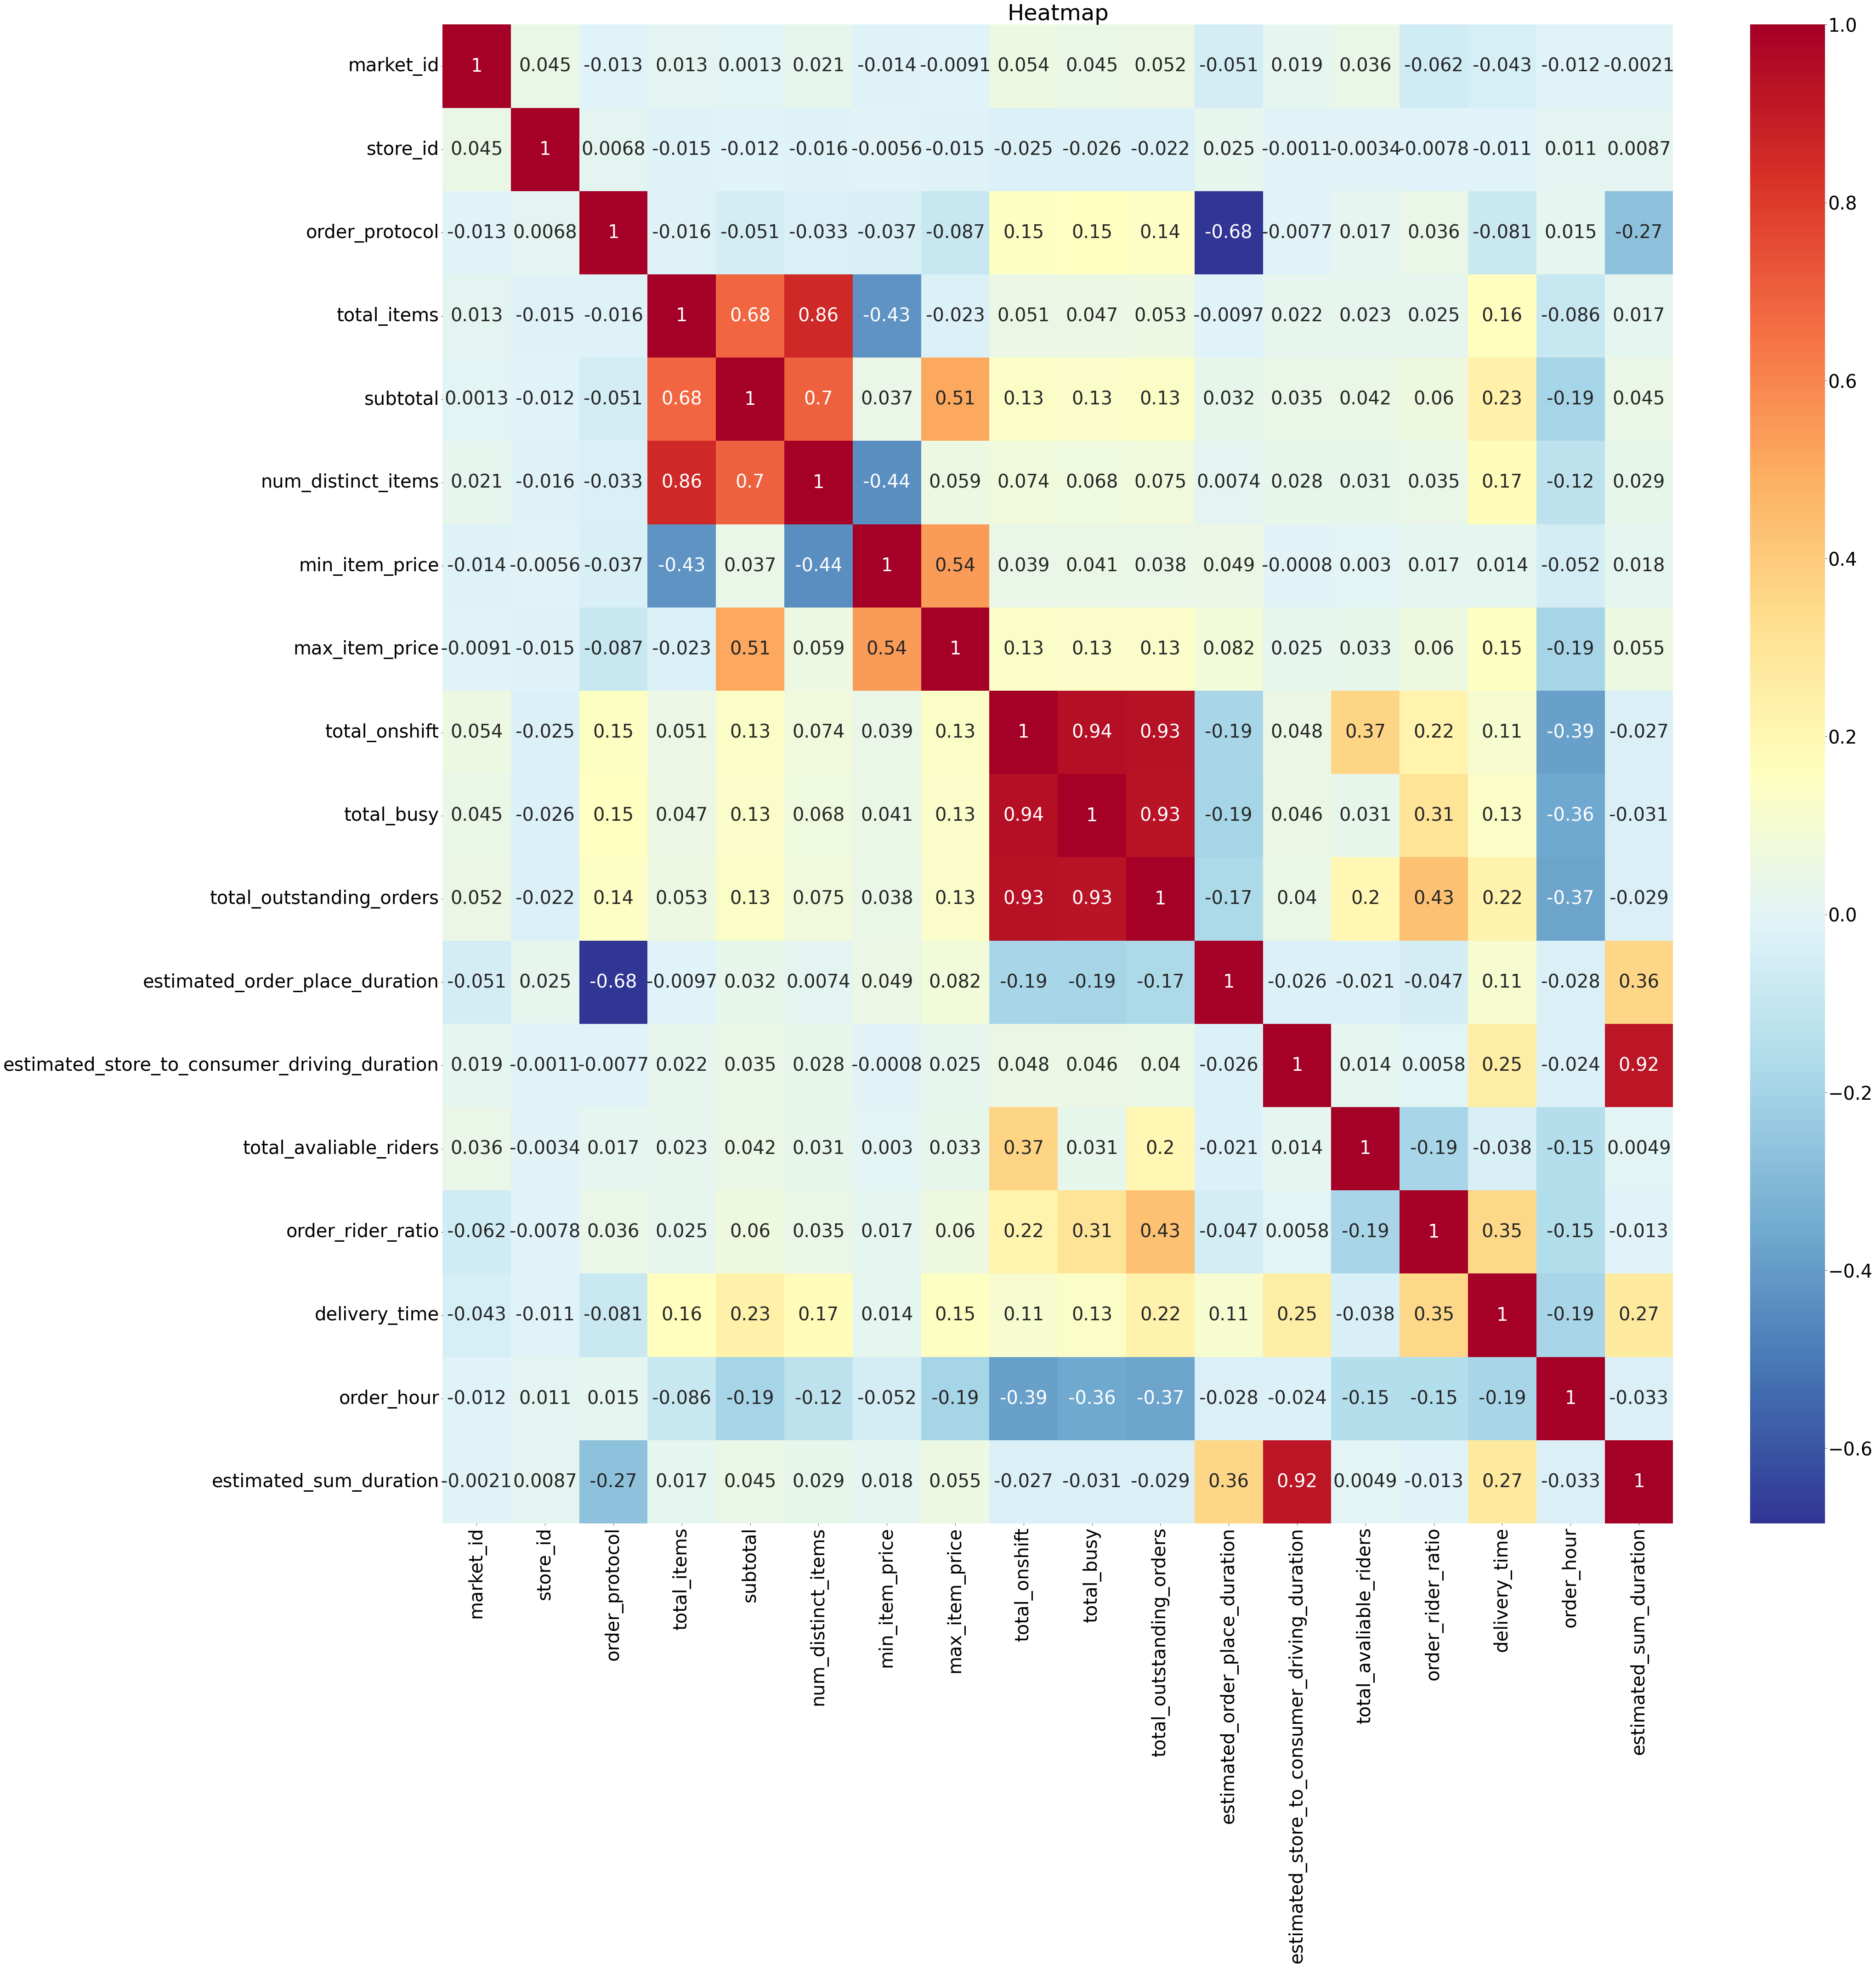

In [9]:
plt.figure(figsize=(60,60))
plt.rc('font',size=40)
plt.rc('axes',labelsize=60)
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Heatmap')

sns.heatmap(data=d2.select_dtypes(include=[float,int,'int8']).corr(),annot=True,
           cmap='RdYlBu_r')

plt.show()


### 상관관계

- 전처리: 데이터가 19만개 정도 되므로 결측치는 전부 버린다. 이후 17만개 정도 남았다. 이후에 음수가 될 수 없는 값이 음수인 경우, 혹은 1개 가격이 전체 가격보다 비싼 데이터를 버린다.
- 전처리 2: 배달 시간이 6500초 이상인 데이터를 버린다.(다른 예측모델에서 예상하는 시간 2개를 더한 최대치는 3222초로 이의 2배 정도)
- delivery_time에 제일 높은 상관관계를 보이는 항목들: order_rider_ratio(0,35), estimated_sum_duration(0.27),subtotal(0.23),estimated_store_to_consumer_driving_duration(0.25), total_outstanding_orders(0.21), order_hour(-0.18)

In [10]:
# 데이터셋 10개 분리
from sklearn.model_selection import train_test_split

x_data = d2.drop(columns=['actual_delivery_time','delivery_time'])
y_data = d2['delivery_time']

x_data['cat']=x_data['store_primary_category']
x_data=pd.get_dummies(x_data,columns=['cat','order_hour','market_id','order_protocol'])

x_data.drop(columns=['created_at','store_primary_category'],inplace=True)

x_data.drop(columns=['store_id'])

#x_data.drop(columns=['total_outstanding_orders','total_onshift'],inplace=True) #파생형 원본 드랍

#x_data.drop(columns=['order_rider_ratio'],inplace=True)


#x_data = x_data[['order_rider_ratio','estimated_sum_duration','subtotal', 'total_outstanding_orders', 'order_hour', 'subtotal']]


x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,random_state = 230428)

#x_data.info()



In [39]:
# 손실함수: 표준편차를 기본으로, under-prediction 을 2배로 반영하기 위해서 
# Over-prediction을 모두 0으로 놓고 한번 더 표준편차를 계산해서 더한다.

def custom_loss(predict, actual):
    diff = actual - predict
    diff2 = diff
    diff2 = np.clip(diff2,0,None)
    return np.std(diff)+np.std(diff2)
    
    
    

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)

model.fit(x_train, y_train)

pred = model.predict(x_test)

#print("train set score :", model.score(x_train, y_train))
#print("test set score :", model.score(x_test, y_test))

#pred += 1.5
for i in range(0,200):
    add_value = i * 20.0
    pred2 = add_value + pred
    diff = y_test - pred2
    under_count = len(diff[diff>0])
    print(f"loss:{custom_loss(pred2, y_test)},rmse:{np.sqrt(mean_squared_error(pred2,y_test))},Under_prediction ratio: {under_count/len(diff)}({under_count}/{len(diff)})")

loss:1361.4550133652401,rmse:805.978612662591,Under_prediction ratio: 0.4282882323437388(17932/41869)
loss:1355.1225576121417,rmse:806.3326214724776,Under_prediction ratio: 0.4177314958561227(17490/41869)
loss:1348.7870603531878,rmse:807.1821782174337,Under_prediction ratio: 0.4084167283670496(17100/41869)
loss:1342.4547355581476,rmse:808.5257208110352,Under_prediction ratio: 0.39879146862834075(16697/41869)
loss:1336.1256443340635,rmse:810.3607922364996,Under_prediction ratio: 0.38933339702405123(16301/41869)
loss:1329.8035343010783,rmse:812.6840628284341,Under_prediction ratio: 0.3800663975733837(15913/41869)
loss:1323.4892733695178,rmse:815.4913600747059,Under_prediction ratio: 0.37084716616112157(15527/41869)
loss:1317.1869444007912,rmse:818.7777053252345,Under_prediction ratio: 0.3616279347488595(15141/41869)
loss:1310.8940301516604,rmse:822.5373566706984,Under_prediction ratio: 0.3520265590293535(14739/41869)
loss:1304.6086930763545,rmse:826.763857156312,Under_prediction ratio: 0

loss:812.2112714361797,rmse:3830.0308039684246,Under_prediction ratio: 0.00040602832644677446(17/41869)
loss:811.9141744885219,rmse:3849.58526749677,Under_prediction ratio: 0.00038214430724402304(16/41869)
loss:811.6286796131694,rmse:3869.1442857703482,Under_prediction ratio: 0.00038214430724402304(16/41869)
loss:811.355124257862,rmse:3888.707790062208,Under_prediction ratio: 0.0002866082304330173(12/41869)
loss:811.0901812382847,rmse:3908.2757130058862,Under_prediction ratio: 0.00026272421123026585(11/41869)
loss:810.8327726544791,rmse:3927.8479885622905,Under_prediction ratio: 0.00026272421123026585(11/41869)
loss:810.5837770506109,rmse:3947.4245519875353,Under_prediction ratio: 0.00026272421123026585(11/41869)
loss:810.3446297545707,rmse:3967.0053398016944,Under_prediction ratio: 0.0002388401920275144(10/41869)
loss:810.1158005600747,rmse:3986.5902897584447,Under_prediction ratio: 0.00021495617282476294(9/41869)
loss:809.8963860765565,rmse:4006.179340815571,Under_prediction ratio: 0

In [14]:
from sklearn.linear_model import Ridge
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    model2 = Ridge(alpha=alpha)
    model2.fit(x_train,y_train)
    pred=model2.predict(x_test)
    print(f"Ridge(alpha:{alpha}) loss:", custom_loss(pred, y_test))


Ridge(alpha:100) loss: 1361.3722663249728
Ridge(alpha:10) loss: 1361.3153149132672
Ridge(alpha:1) loss: 1361.4277916374658
Ridge(alpha:0.1) loss: 1361.4520699952886
Ridge(alpha:0.01) loss: 1361.4547172928105
Ridge(alpha:0.001) loss: 1361.454983742131
Ridge(alpha:0.0001) loss: 1361.4550104027885


In [15]:
from sklearn.linear_model import Lasso
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    model3 = Lasso(alpha=alpha)
    model3.fit(x_train,y_train)
    pred=model3.predict(x_test)
    print(f"Lasso(alpha:{alpha}) loss:", custom_loss(pred, y_test))


Lasso(alpha:100) loss: 1435.7903594707527
Lasso(alpha:10) loss: 1382.9630083778206


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e+08, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha:1) loss: 1363.8144279841267


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.771e+08, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha:0.1) loss: 1361.2521454922528


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+09, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha:0.01) loss: 1361.3772344314266


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+10, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha:0.001) loss: 1361.4471188882244
Lasso(alpha:0.0001) loss: 1361.4543551794575


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+10, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


In [16]:
from sklearn.linear_model import ElasticNet

for ratio in [0.2,0.5,0.8]:
    model4 = ElasticNet(alpha=0.5, l1_ratio=ratio)
    model4.fit(x_train,y_train)
    pred=model4.predict(x_test)
    print(f"ElasticNet(ratio:{ratio}) loss:", custom_loss(pred, y_test))



C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.161e+10, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet(ratio:0.2) loss: 1408.475838170406


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e+10, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet(ratio:0.5) loss: 1400.43496348392
ElasticNet(ratio:0.8) loss: 1384.8421789427193


C:\Python\310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.318e+10, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


### 파라미터 튜닝
- 가급적 모든 파라미터를 사용하는 경우 정확도가 높다.
- 정확도를 위해서는 store_primary_category, order_protocol 등의 카테고리 변수들도 get_dummies를 이용해 One-Hot Encoding을 해주는 것이 좋다.
- loss 값이 제일 작은 모델들도 1361 정도이며, 선형회귀, lasso(alpha가 1보다 작을 때), Ridge 등이 해당된다.
